In [1]:

import numpy as np 
import pandas as pd 


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

# Importing data 


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Admin\Downloads\Ruthvik-Capstone Project-R1\Cars Dataset\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:

    print(image_batch[0])
    break

[[[0.92888534 0.9367285  0.9837873 ]
  [0.9287096  0.93655276 0.9836116 ]
  [0.92853385 0.936377   0.9834358 ]
  ...
  [0.9568628  0.9686275  0.98823535]
  [0.95704174 0.96880645 0.9884143 ]
  [0.9609593  0.972724   0.99233186]]

 [[0.9226294  0.93047255 0.98092264]
  [0.9229809  0.93082404 0.98109835]
  [0.9233324  0.93117553 0.9812741 ]
  ...
  [0.9568628  0.9686275  0.98823535]
  [0.95721745 0.96898216 0.98859   ]
  [0.9611351  0.9728998  0.99250764]]

 [[0.9147942  0.92263734 0.9803922 ]
  [0.9151457  0.92298883 0.9803922 ]
  [0.9154972  0.9233403  0.9803922 ]
  ...
  [0.9568628  0.9686275  0.98823535]
  [0.9573932  0.96915793 0.9887658 ]
  [0.9613108  0.9730755  0.99268335]]

 ...

 [[0.54509807 0.5176471  0.49411768]
  [0.5420662  0.52067894 0.5032131 ]
  [0.5472323  0.5276244  0.51193815]
  ...
  [0.6025473  0.58293945 0.55941004]
  [0.605535   0.5859271  0.5623977 ]
  [0.6085227  0.5889149  0.56538546]]

 [[0.54509807 0.5176471  0.49411768]
  [0.5418905  0.52085465 0.5037404 ]


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r'C:\Users\Admin\Downloads\Ruthvik-Capstone Project-R1\Cars Dataset\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [7]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.08022839 0.09983624 0.1782676 ]
  [0.08235294 0.10196079 0.18039216]
  [0.08408993 0.10369778 0.18212916]
  ...
  [0.14901961 0.28627452 0.43529415]
  [0.14901961 0.28627452 0.43529415]
  [0.14901961 0.28627452 0.43529415]]

 [[0.07974415 0.09935199 0.17778337]
  [0.08235294 0.10196079 0.18039216]
  [0.08360569 0.10321353 0.18164492]
  ...
  [0.14901961 0.28627452 0.43529415]
  [0.14901961 0.28627452 0.43529415]
  [0.14901961 0.28627452 0.43529415]]

 [[0.0792599  0.09886774 0.17729913]
  [0.08235294 0.10196079 0.18039216]
  [0.08312144 0.10272929 0.18116067]
  ...
  [0.14901961 0.28627452 0.43529415]
  [0.14873536 0.28684306 0.4355784 ]
  [0.14825112 0.28781155 0.43606263]]

 ...

 [[0.17536129 0.36751816 0.52830243]
  [0.176814   0.36897087 0.52975523]
  [0.17826673 0.37042361 0.531208  ]
  ...
  [0.16182438 0.31868714 0.4598636 ]
  [0.17463058 0.33149335 0.47266984]
  [0.14529805 0.30216077 0.44333726]]

 [[0.18925054 0.37697822 0.53997713]
  [0.19118752 0.3779467  0.5414299 ]


# Creating the CNN model

In [8]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2764896   
_________________________________________________________________
dropout (Dropout)            (None, 96)                0

In [10]:
# compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

Epoch 1/15
105/105 [==============================] - 245s 2s/step - loss: 1.9004 - accuracy: 0.2402 - val_loss: 1.8038 - val_accuracy: 0.3050
Epoch 2/15
105/105 [==============================] - 52s 493ms/step - loss: 1.7684 - accuracy: 0.3323 - val_loss: 1.6532 - val_accuracy: 0.3936
Epoch 3/15
105/105 [==============================] - 41s 387ms/step - loss: 1.6505 - accuracy: 0.3893 - val_loss: 1.5584 - val_accuracy: 0.4453
Epoch 4/15
105/105 [==============================] - 38s 365ms/step - loss: 1.5487 - accuracy: 0.4293 - val_loss: 1.4528 - val_accuracy: 0.4686
Epoch 5/15
105/105 [==============================] - 38s 365ms/step - loss: 1.4562 - accuracy: 0.4699 - val_loss: 1.4203 - val_accuracy: 0.4859
Epoch 6/15
105/105 [==============================] - 37s 356ms/step - loss: 1.3591 - accuracy: 0.4961 - val_loss: 1.3105 - val_accuracy: 0.5510
Epoch 7/15
105/105 [==============================] - 37s 352ms/step - loss: 1.2997 - accuracy: 0.5260 - val_loss: 1.2499 - val_accu

In [12]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 4s 155ms/step - loss: 1.0023 - accuracy: 0.6359


In [13]:
scores

[1.0023095607757568, 0.6359163522720337]

# Graphical Plot of  the accuracy and loss curves

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
type(history.history['loss'])

list

In [16]:
len(history.history['loss'])

15

In [17]:
history.history['loss'][:5] 

[1.9004101753234863,
 1.7683990001678467,
 1.6505463123321533,
 1.5486767292022705,
 1.45619535446167]

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

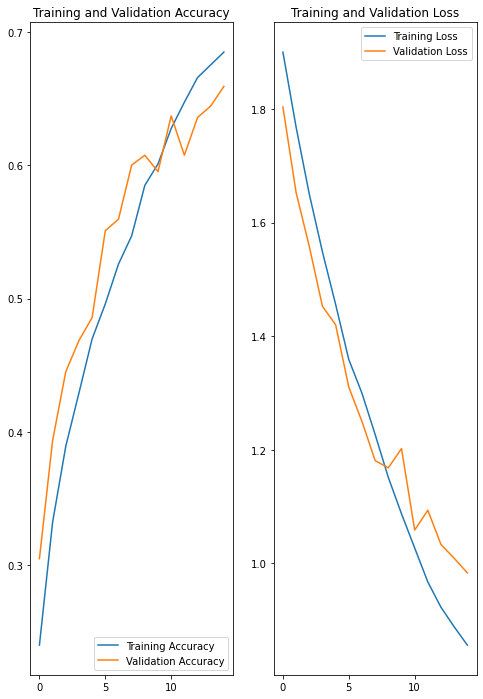

In [19]:
import matplotlib.pyplot as plt
EPOCHS = 15

plt.figure(figsize=(8, 12))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the prediction on sample of image from test dataset

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

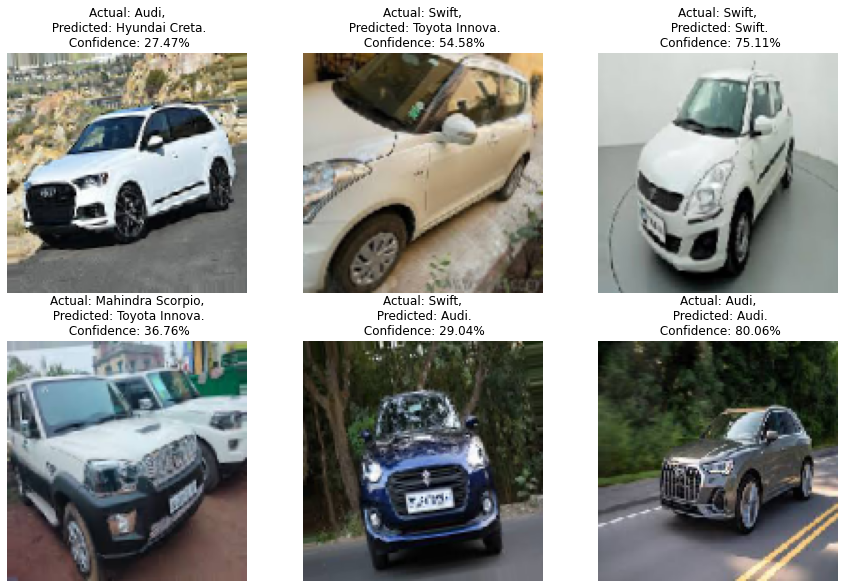

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# DenseNet

In [22]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [23]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [24]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [25]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [26]:
r = model.fit(
    train_generator, 
    epochs=7,
    validation_data=test_generator,
    steps_per_epoch=30,
    validation_steps=25,
)

Epoch 1/7
30/30 [==============================] - 189s 6s/step - loss: -38.4731 - accuracy: 0.2448 - val_loss: -81.3610 - val_accuracy: 0.2400
Epoch 2/7
30/30 [==============================] - 189s 6s/step - loss: -105.2763 - accuracy: 0.1833 - val_loss: -30.3945 - val_accuracy: 0.2525
Epoch 3/7
30/30 [==============================] - 191s 6s/step - loss: -166.8076 - accuracy: 0.1469 - val_loss: -578.2840 - val_accuracy: 0.0825
Epoch 4/7
30/30 [==============================] - 192s 6s/step - loss: -237.3306 - accuracy: 0.0777 - val_loss: -657.5792 - val_accuracy: 0.0812
Epoch 5/7
30/30 [==============================] - 190s 6s/step - loss: -321.2110 - accuracy: 0.0840 - val_loss: -8800.4434 - val_accuracy: 0.0838
Epoch 6/7
30/30 [==============================] - 191s 6s/step - loss: -432.2628 - accuracy: 0.0708 - val_loss: -5498.4004 - val_accuracy: 0.0812
Epoch 7/7
30/30 [==============================] - 191s 6s/step - loss: -582.8264 - accuracy: 0.0812 - val_loss: -2707.7949 -

Text(0.5, 1.0, 'Car model Recognization Accuracy Evolution')

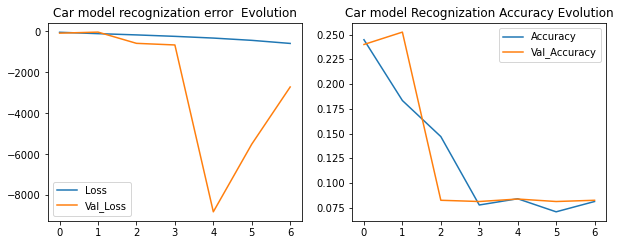

In [27]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Car model recognization error  Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Car model Recognization Accuracy Evolution')

In [28]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy for  car model recognization: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy for  car model recognization: {evaluation[1] * 100:.2f}%")

26/26 [==============================] - 28s 1s/step - loss: -2661.8979 - accuracy: 0.0824
Test Accuracy for  car model recognization: 8.24%
105/105 [==============================] - 96s 912ms/step - loss: -2676.1853 - accuracy: 0.0808
Train Accuracy for  car model recognization: 8.08%


# Evaluation

In [29]:
predicted_vals = model.predict(test_generator, steps=len(test_generator))

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
print(confusion_matrix(test_generator.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test_generator.classes, predicted_vals > 0.5, output_dict=True))

[[  0 199   0   0   0   0   0]
 [  0  67   0   0   0   0   0]
 [  0  75   0   0   0   0   0]
 [  0  74   0   0   0   0   0]
 [  0 102   0   0   0   0   0]
 [  0 106   0   0   0   0   0]
 [  0 190   0   0   0   0   0]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.0,0.082411,0.0,0.0,0.0,0.0,0.0,0.082411,0.011773,0.006792
recall,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.082411,0.142857,0.082411
f1-score,0.0,0.152273,0.0,0.0,0.0,0.0,0.0,0.082411,0.021753,0.012549
support,199.0,67.000000,75.0,74.0,102.0,106.0,190.0,0.082411,813.000000,813.000000
